# Portuguese data set with day zero BI, FIM, and MOCA values and the 90 days value

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras

In [2]:
FIM = 'Functional Independence Measure'
BI = 'Barthel Index'
BDI = 'Beck Depression Index'
MOCA = 'Montreal Cognitive Assessment'

In [3]:
fbbm_df = pd.read_csv('Moca_BI_FIM_data.csv',header=3)
fbbm_df.dropna(axis=0, thresh=0.3, inplace=True)

In [4]:
features = fbbm_df.iloc[:,0:7]
target = fbbm_df.iloc[:,7:11]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [6]:
from sklearn import model_selection
train_data, test_data, train_label, test_label = model_selection.train_test_split(features, 
                                                                                  target,
                                                                                  test_size=0.1,
                                                                                  shuffle=True)

In [7]:
train_label = np.array(train_label)
test_label = np.array(test_label)
try:
    n_inputs, n_outputs = train_data.shape[1], train_label.shape[1]
except:
    try:
        n_inputs = train_data.shape[1]
        n_outputs = 1
    except:
        n_inputs = 1
        n_outputs = 1

In [8]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(n_inputs,)),
    tf.keras.layers.Dense(64, activation='linear'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(n_outputs, activation='linear')
])

2022-07-22 16:06:11.113966: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2022-07-22 16:06:11.113989: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: brugha-linux
2022-07-22 16:06:11.113993: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: brugha-linux
2022-07-22 16:06:11.114131: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 495.29.5
2022-07-22 16:06:11.114143: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.48.7
2022-07-22 16:06:11.114147: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.48.7 does not match DSO version 495.29.5 -- cannot find working devices in this configuration
2022-07-22 16:06:11.114380: I tensorflow/core/platform/cpu_feature_guard.cc:193] This Te

In [9]:
model.compile(optimizer='adam', 
              #loss='categorical_crossentropy',
              loss ='mean_absolute_error',
              metrics=['acc'])

In [10]:
epoch = 150
history = model.fit(
    train_data, 
    train_label, 
    epochs=epoch, 
    validation_split=0.2,
    verbose=0, batch_size=512
)

In [11]:
test_loss, test_acc = model.evaluate(test_data,test_label)
print('Accuracy: {}%'.format(np.round(test_acc*100),2),
     'Loss: {}'.format(test_loss))

1/1 [==============================] - 0s 10ms/step - loss: 12.1183 - acc: 1.0000
Accuracy: 100.0% Loss: 12.118258476257324


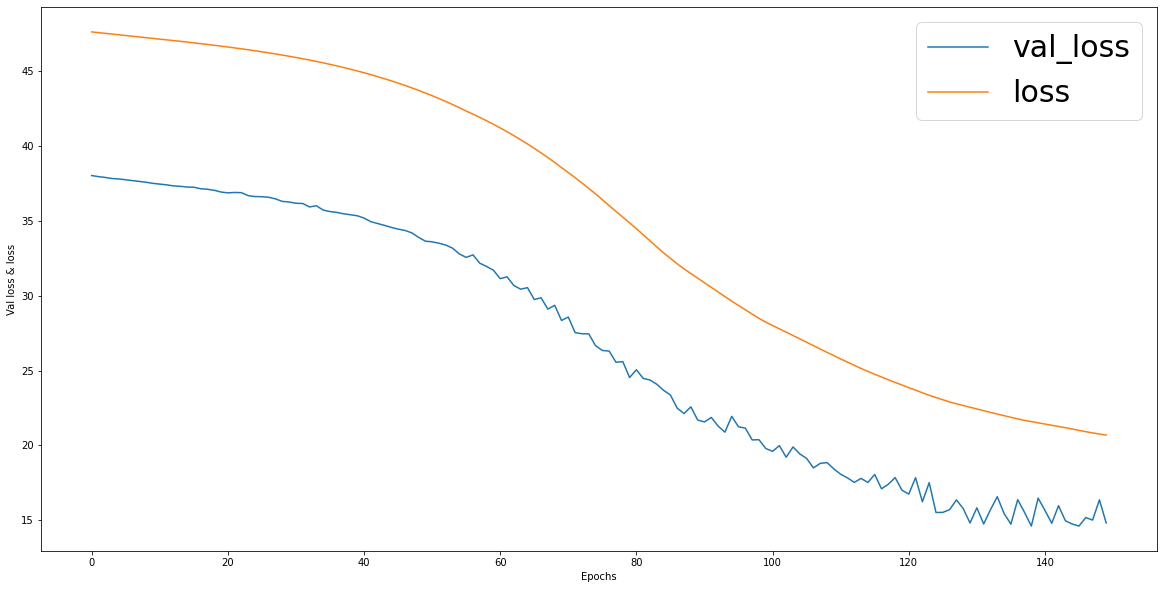

In [12]:
plt.figure(figsize=(20,10))
plt.plot(list(range(epoch)), history.history['loss'], history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Val loss & loss')
plt.legend(('val_loss', 'loss'), prop={'size':30})
plt.show()

In [13]:
list_of_predictions = []
for i in range(len(test_data)):
    a = test_data[i]
    a = np.expand_dims(a, 0)
    b = np.round(model.predict(a, verbose=0),1)
    list_of_predictions.append(b[0].tolist())
print(list_of_predictions[0], test_label[0])

[51.20000076293945, 71.5999984741211, 19.899999618530273, 14.800000190734863] [30 64  5 18]
